<img src="http://s3.amazonaws.com/pix.iemoji.com/images/emoji/apple/ios-12/256/waving-hand.png" align=left width=44, heigth=44>
<div class="alert alert-info">
<b> Комментарий ревьюера</b>


Привет, Надежда! Давай знакомиться! Меня зовут Дмитрий Махортов, и я буду проверять твой проект. Сразу предлагаю общение на «ты» 🙂, но если тебе это не комфортно, то дай знать, и мы перейдем на «вы». 


Моя основная цель — не указать на совершенные тобою ошибки, а поделиться своим опытом и помочь тебе погрузиться в увлекательный мир работы с данными и вырасти в крепкого профи. Это отдаленная цель. А ближайшая - сделать твою работу еще лучше )).
   
    
Все ключевые этапы в работе выполнены, и я вижу что с проектом ты справшяешься. Есть моменты, которые нужно доработать, но я уверен, у тебя все получится.
        
Расскажу как обычно проходит проверка:    
Бывают моменты, которые требуют пристального внимания. Комментарии по ним выделены <span style='background-color:#F7B3A4'> красным цветом </span> и обозначены значком 🛑. После их доработки проект будет принят.  🙂
 
<span style='background-color:#B7EBA7'> Зеленым цветом </span> и значком ✅ отмечены удачные и элегантные решения, на которые можно опираться в будущих проектах. Или советы «со звездочкой», которые помогут тебе в будущем.

<span style='background-color:#F9EDA6'>Жёлтым цветом </span> и значком ⚠️ выделено то, что в следующий раз можно сделать по-другому. Ты можешь учесть эти комментарии при выполнении будущих заданий или доработать проект сейчас (однако это не обязательно).

Давай работать над проектом в диалоге: **если ты что-то меняешь в проекте по моим рекомендациям — пиши об этом**. Выбери для своих комментариев какой-то заметный цвет, так мне будет легче отследить изменения. Пожалуйста, **не перемещай, не изменяй и не удаляй мои комментарии**. Всё это поможет выполнить повторную проверку твоего проекта оперативнее. 
</div>

<div class="alert" style="background-color:#ead7f7;color:#8737bf">
    <font size="3"><b>образец комментария студента</b></font>
   
Можешь использовать этот комментарий. Просто удали этот текст и вместо него напиши свой 🙂

</div>

## Задача
1. Необходимо разработать демонстрационную версию поиска изображений по запросу.
2. Для демонстрационной версии нужно обучить модель. Модель получает векторное представление изображения, векторное представление текста, а на выходе должна выдавать число от 0 до 1, отражающее соответствие текста и картинки.

<img src="https://upload.wikimedia.org/wikipedia/commons/thumb/8/81/Stop_sign.png/240px-Stop_sign.png" align=left width=35, heigth=35>
<div class="alert alert-danger">
Насколько я помню мы с первого проекта учили, что проекты должны соответствоватьо определенной структуре.

Структура включает название проекта (заголовок), который должен быть информативен и позволять идентифицировать этот проект. Также стоит написать понятное описание преокта (можно взять из прекода).
</div>

# Название проекта: Разработка демонстрационной версии поиска изображений по запросу

## Описание проекта
В данном проекте будет разработана демонстрационная версия поиска изображений по запросу.
Для демонстрационной версии будет обучена модель, которая получит векторное представление изображения, векторное представление текста, а на выходе выдаст число от 0 до 1 — покажет, насколько текст и картинка подходят друг другу.

## Описание данных
1. В файле train_dataset.csv собрана информация, необходимая для обучения. Для одной картинки может быть доступно до 5 описаний.
2. В папке train_images содержатся изображения для тренировки модели.
3. В файле CrowdAnnotations.tsv приведены данные по соответствию изображения и описания, полученные с помощью краудсорсинга.
4. В файле ExpertAnnotations.tsv содержатся данные по соответствию изображения и описания, полученные в результате опроса экспертов. Эксперты ставят оценки по шкале от 1 до 4, где 1 — изображение и запрос совершенно не соответствуют друг другу, 2 — запрос содержит элементы описания изображения, но в целом запрос тексту не соответствует, 3 — запрос и текст соответствуют с точностью до некоторых деталей, 4 — запрос и текст соответствуют полностью.
5. В файле test_queries.csv находится информация, необходимая для тестирования. Для одной картинки может быть доступно до 5 описаний. 
6. В папке test_images содержатся изображения для тестирования модели.

## Импортируем необходимые библиотеки

In [1]:
import pandas as pd
import numpy as np
import os
import random
import time
from scipy.stats import randint, uniform
import spacy
import re
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import seaborn as sns
import torch
import torch.nn as nn
import transformers

from IPython.display import display

from sklearn.metrics.pairwise import cosine_similarity
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.decomposition import PCA
from sklearn.utils.class_weight import compute_class_weight
from sklearn.model_selection import train_test_split, GroupShuffleSplit
from sklearn.preprocessing import StandardScaler


import torch.optim as optim
from torch.utils.data import Dataset, DataLoader
from torchvision import transforms, models, datasets

from tqdm import notebook
from tqdm import tqdm
from transformers import BertTokenizer, BertModel
from PIL import Image

<img src="https://emojigraph.org/media/apple/check-mark-button_2705.png" align=left width=33, heigth=33>
<div class="alert alert-success">
Отлично, все нужные библиотеки импортированы в начале ноутбука.Это хорошая практика.</div>

### Загрузка файла с мнением экспертов 

In [2]:
# Путь к папке с данными проекта
path_to_prj = '/Users/naziaignatenko/Public/PRACTICUM_YANDEX/Projects/project_5/project_5_data/'

<img src="https://emojigraph.org/media/apple/check-mark-button_2705.png" align=left width=33, heigth=33>
<div class="alert alert-success">
Большое тебе человеческое спасибо за вынос пути к данным в отдельную константу. Это сэкономило мне немало времени при проверке.</div>

<div class="alert" style="background-color:#ead7f7;color:#8737bf">
    <font size="3"><b></b></font>
   
Убрала конструкцию try/except 

</div>

In [3]:
# Загрузка файла с оценкой эксперртов
file_path = os.path.join(path_to_prj, 'ExpertAnnotations.tsv')
expert_df = pd.read_csv(file_path, 
                        sep='\t', 
                        names=['image', 'description_id', 'expert1', 'expert2', 'expert3']
                       )

expert_df.head()

image               description_id  expert1  expert2  \
0  1056338697_4f7d7ce270.jpg  2549968784_39bfbe44f9.jpg#2        1        1   
1  1056338697_4f7d7ce270.jpg  2718495608_d8533e3ac5.jpg#2        1        1   
2  1056338697_4f7d7ce270.jpg  3181701312_70a379ab6e.jpg#2        1        1   
3  1056338697_4f7d7ce270.jpg  3207358897_bfa61fa3c6.jpg#2        1        2   
4  1056338697_4f7d7ce270.jpg  3286822339_5535af6b93.jpg#2        1        1   

   expert3  
0        1  
1        2  
2        2  
3        2  
4        2

<img src="https://upload.wikimedia.org/wikipedia/commons/b/ba/Warning_sign_4.0.png" align=left width=44, heigth=33>
<div class="alert alert-warning">
В этом проекте использование конструкции try/except мне кажется излишним. Если константа с путем к данным будет неверной, то с проектом все равно не получится работать, поэтому думаю нет смысла услжнять код.
    
-------------------------------    
    
Еще момент - способы формирования путей в OS Linux и OS Windows различаются (ипользуются прямой и обратный слэш). Поэтому способ склейки через +"/"+ не универсальный. Лучше использовать os.path.join    
</div>

In [4]:
expert_df.shape

(5822, 5)

In [5]:
expert_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5822 entries, 0 to 5821
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   image           5822 non-null   object
 1   description_id  5822 non-null   object
 2   expert1         5822 non-null   int64 
 3   expert2         5822 non-null   int64 
 4   expert3         5822 non-null   int64 
dtypes: int64(3), object(2)
memory usage: 227.6+ KB


In [6]:
# Проверка  уникальных значений в колонках с оценками экспертов
columns = ['expert1', 'expert2', 'expert3']
for column in columns:
    print(expert_df[column].unique())

[1 2 3 4]
[1 2 3 4]
[1 2 3 4]


In [7]:
# Проверка уникальных комбинаций image и description_id
print(f"Уникальных комбинаций image и description_id: {expert_df[['image', 'description_id']].drop_duplicates().shape[0]}")

Уникальных комбинаций image и description_id: 5822


### Выводы по анализу датафрейма с оценкой экспертов
1. Датафрейм содержит 5 столбцов, из которых три относятся к оценкам трех разных экспертов, и 5822 строк.
2. Данные в столбцах с оценками экспертов (3 столбца) относятся к типу int, а ID изображений и текстов относятся к типу object.
3. Пропущенные значения отсутствуют.
4. Все комбинации изображений с соответствующими описаниями являются уникальными, дубликатов нет.
5. Максимальная оценка эксперта соотвествует 4, а минимальная равна 1.

<img src="https://emojigraph.org/media/apple/check-mark-button_2705.png" align=left width=33, heigth=33>
<div class="alert alert-success">
ОК, первая табличка загружена, есть первичное знакомство с данными. </div>

### Вычисление нормализованного показателя оценки экспертов

In [8]:
# Сумма оценок всех экспертов для каждой строки
expert_df["total_expert_score"] = expert_df["expert1"] + expert_df["expert2"] + expert_df["expert3"]

# Максимально возможный балл (количество экспертов * максимальный балл от каждого эксперта)
max_total_expert_score = 3 * 4

# Расчет нормализованного результата 
# (переводим общую оценку экспертов в диапазон 0-1)
min_score = 3  # минимальная оценка одного эксперта (1) * количество кспертов (3)
max_score = 12 # максимальная оценка одного эксперта (4) * количество кспертов (3)

expert_df["normalized_score"] = (expert_df["total_expert_score"] - min_score) / (max_score - min_score)

# Вывод первых строк для проверки
expert_df.head()

image               description_id  expert1  expert2  \
0  1056338697_4f7d7ce270.jpg  2549968784_39bfbe44f9.jpg#2        1        1   
1  1056338697_4f7d7ce270.jpg  2718495608_d8533e3ac5.jpg#2        1        1   
2  1056338697_4f7d7ce270.jpg  3181701312_70a379ab6e.jpg#2        1        1   
3  1056338697_4f7d7ce270.jpg  3207358897_bfa61fa3c6.jpg#2        1        2   
4  1056338697_4f7d7ce270.jpg  3286822339_5535af6b93.jpg#2        1        1   

   expert3  total_expert_score  normalized_score  
0        1                   3          0.000000  
1        2                   4          0.111111  
2        2                   4          0.111111  
3        2                   5          0.222222  
4        2                   4          0.111111

<img src="https://upload.wikimedia.org/wikipedia/commons/thumb/8/81/Stop_sign.png/240px-Stop_sign.png" align=left width=35, heigth=35>
<div class="alert alert-danger">
К сожалению здесь ошибка в логике.  Просто деля сумму экспертных оценок на 12, ты получишь  минимальную оценку равную 0,25, а мы стремимся перевести экспертные оценки в диапазон 0-1.

Здесь нужно испльзовать более сложное линейное пребразование: (x - мин_оценка) / (макс_оценка - мин_оценка).

</div>


<div class="alert" style="background-color:#ead7f7;color:#8737bf">
    <font size="3"><b></b></font>
   
Для вычисления нормализованной экспертной оценки использованао преобразование  линейное пребразование:
    
    (x - мин_оценка) / (макс_оценка - мин_оценка) 

</div>

In [9]:
# Миниммальная общая оценка экспертов
print(expert_df['normalized_score'].min())

0.0


In [10]:
# Максимальная общая оценка экспертов
print(expert_df['normalized_score'].max())

1.0


#### Создан дополнительный столбец normalized_score с вычисленной общей нормализоваанной оценкой трех экспертов с учетом оценки каждого эксперта.

### Загрузка файла с оценками краудсорсеров 

<img src="https://upload.wikimedia.org/wikipedia/commons/b/ba/Warning_sign_4.0.png" align=left width=44, heigth=33>
<div class="alert alert-warning">
Непонятно, как появился термин "граждан". 
    
Давай поймем, что у нас за оценки и что это за эксперты такие?
    
Давай начнем с того, что чтобы сопоставить картинку с описанием достаточно минимального образования, главное понимать язык, на котором эти описания есть. Поэтому эксперты  в нашем случае - это просто люди, прошедшие какой-то инструктаж и более аккуратно размечающие степень соответствия изображения описанию по шкале 1-2-3-4.   
    
А краудсорсеры - это более дешевые исполнители, которые отвечали ДА/НЕТ на какой-нибудь онлайн-платформе, где выполняют разные задачи за деньги (часто как раз связанные с разметкой данных).
    
Поэтому я бы не стал придумывать новые термины, а использовал стандартный для индустрии термин - краудсорс.    
</div>

In [11]:
file_path = os.path.join(path_to_prj, 'CrowdAnnotations.tsv')
crowd_df = pd.read_csv(file_path, 
                       sep='\t', 
                       names=['image', 'description_id', 'yes_fraction', 'yes_number', 'no_number']
                      )

crowd_df.sample(5)

image               description_id  yes_fraction  \
28598  3239021459_a6b71bb400.jpg   326456451_effadbbe49.jpg#2           0.0   
31994  3364861247_d590fa170d.jpg  1282392036_5a0328eb86.jpg#2           0.0   
20308  2905942129_2b4bf59bc0.jpg  3316725440_9ccd9b5417.jpg#2           0.0   
47316   888425986_e4b6c12324.jpg  2949982320_c704b31626.jpg#2           0.0   
15326  2610447973_89227ff978.jpg   470373679_98dceb19e7.jpg#2           0.0   

       yes_number  no_number  
28598           0          3  
31994           0          3  
20308           0          3  
47316           0          3  
15326           0          3

In [12]:
crowd_df.shape

(47830, 5)

In [13]:
crowd_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 47830 entries, 0 to 47829
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   image           47830 non-null  object 
 1   description_id  47830 non-null  object 
 2   yes_fraction    47830 non-null  float64
 3   yes_number      47830 non-null  int64  
 4   no_number       47830 non-null  int64  
dtypes: float64(1), int64(2), object(2)
memory usage: 1.8+ MB


In [14]:
# Проверка уникальных значений в колонках 'yes_fraction', 'yes_number', 'no_number'
columns = ['yes_fraction', 'yes_number', 'no_number']
for column in columns:
    print(crowd_df[column].unique())

[1.         0.         0.33333333 0.66666667 0.25       0.6
 0.2        0.5        0.4        0.75       0.16666667 0.8       ]
[3 0 1 2 4 5]
[0 3 2 1 4 5 6]


In [15]:
# Группировка данных по столбцу 'yes_fraction' и определение количества вхождений
crowd_df.groupby('yes_fraction')['yes_fraction'].value_counts()

yes_fraction
0.000000    41970
0.166667        3
0.200000       22
0.250000       96
0.333333     3000
0.400000        8
0.500000       27
0.600000        8
0.666667     1360
0.750000        9
0.800000        4
1.000000     1323
Name: count, dtype: int64

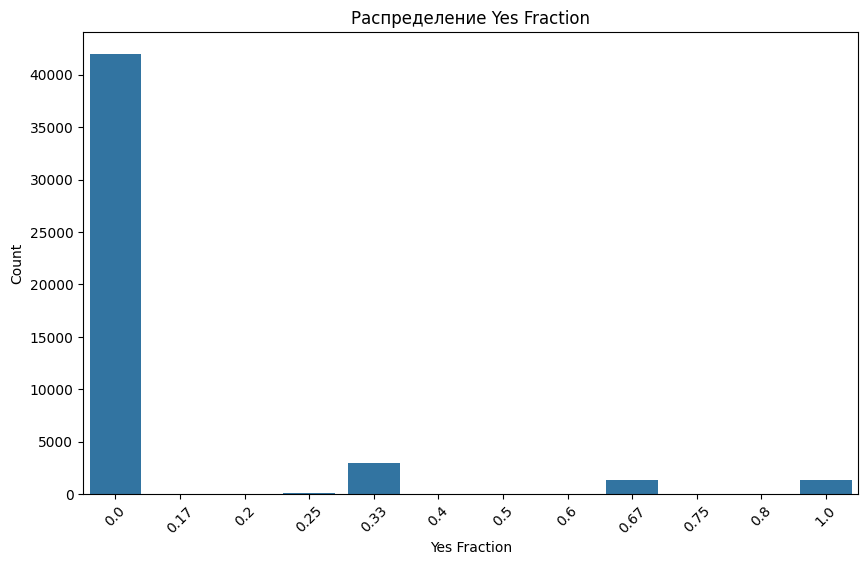

In [16]:
# Построим график
# Группируем данные по 'yes_fraction' и считаем количество вхождений
yes_fraction_counts = crowd_df['yes_fraction'].value_counts().reset_index()
yes_fraction_counts.columns = ['yes_fraction', 'count']

# Строим график
plt.figure(figsize=(10, 6))
sns.barplot(x=round(yes_fraction_counts['yes_fraction'], 2), y=yes_fraction_counts['count'])

# Настройки графика
plt.xlabel("Yes Fraction")
plt.ylabel("Count")
plt.title("Распределение Yes Fraction")
plt.xticks(rotation=45)  # Поворачиваем подписи оси X, если нужно
plt.show()

41970 краудсорсеров, поставили оценку 0, которая значительно преобладает по сравнению с другими оценками.

In [17]:
# Проверим содержат ли столбцы 'yes_number', 'no_number'одновременно значения, равные нулю
crowd_df.loc[(crowd_df['yes_number']==0) & (crowd_df['no_number']==0)].sum()

image               0
description_id      0
yes_fraction      0.0
yes_number          0
no_number           0
dtype: object

In [18]:
# Посмотрим на уникальные комбинации image и description_id
print(f"Уникальных комбинаций image и description_id: {crowd_df[['image', 'description_id']].drop_duplicates().shape[0]}")

Уникальных комбинаций image и description_id: 47830


In [19]:
# Добавим новый столбец с общим количеством краудсорсеров по каждому изображению
crowd_df['total'] = crowd_df['yes_number'] + crowd_df['no_number']

In [20]:
crowd_df['total'].unique()

array([3, 4, 5, 6])

In [21]:
crowd_df.groupby('total')['total'].value_counts()

total
3    46780
4      780
5      220
6       50
Name: count, dtype: int64

### Выводы по анализу датафрейма с оценкой граждан
1. Датафрейм содержит 5 столбцов и 47830 строк, что почти в 9 раз больше, чем строк в датафрейме с оценками экспертов.
2. Этот датафрейм также содержит два столбца с ID изображений и текстов с типом даннх object. Столбец, содержащий среднюю оценку участников имеет тип данных float, и последние два столбца с количеством участников, которые дали либо положительную, либо отрицательную оценку, имеют тип данных int.
3. Датафрейм не содержит пропущенных данных.
4. Средняя оценка краудсорсеров варьирует в пределах от 0 до 1, однако 41970 из 47830 участников поставили оценку 0.
5. Максимальное количество краудсорсеров - 6, а минимальное 3. В основном в оценке принимали участие три человека (46780 из 47830) и намного реже больше трех.
6. Все комбинации изображений с соответствующими описаниями являются уникальными, дубликатов нет.

<img src="https://emojigraph.org/media/apple/check-mark-button_2705.png" align=left width=33, heigth=33>
<div class="alert alert-success">
Да, краудсорс оценки загружены и исследованы </div>

<img src="https://upload.wikimedia.org/wikipedia/commons/b/ba/Warning_sign_4.0.png" align=left width=44, heigth=33>
<div class="alert alert-warning">
Мне кажется ты торопишься. Давай мы вначале загрузим все данные, познакомимся с ними, сформулируем выводы.
    
Ты еще даже не загрузила все таблицы,  не познакомилась с ними но уже начинаешь что-то соединять.  По моим наблюдениям лишняя спешка ведёт к тому, что выполняется очень много лишних и неоптимальных действий.
      
    
</div>


### Объединим две таблицы

In [22]:
# Объединяем таблицы по полям 'image' и 'description_id'
comb_score_df = pd.merge(
    expert_df[['image', 'description_id', 'normalized_score']],  # Оставляем только нужные столбцы из expert_df
    crowd_df[['image', 'description_id', 'yes_fraction', 'total']], # Оставляем нужные столбцы из crowd_df
    how = 'left', 
    on=['image', 'description_id']  # Объединение по этим полям
)
comb_score_df.sample(5)

image               description_id  \
4123  3442242092_e579538d82.jpg  3433982387_3fa993cf5a.jpg#2   
2290  2844018783_524b08e5aa.jpg  2559921948_06af25d566.jpg#2   
4172  3458559770_12cf9f134e.jpg  3601843201_4809e66909.jpg#2   
4320  3499720588_c32590108e.jpg  2248487950_c62d0c81a9.jpg#2   
2994  3106026005_473a7b1c8c.jpg   473220329_819a913bbb.jpg#2   

      normalized_score  yes_fraction  total  
4123          0.111111           NaN    NaN  
2290          0.111111           NaN    NaN  
4172          0.444444           0.0    3.0  
4320          0.111111           0.0    3.0  
2994          0.000000           NaN    NaN

<img src="https://emojigraph.org/media/apple/check-mark-button_2705.png" align=left width=33, heigth=33>
<div class="alert alert-success">

По объединению экспертных и крауд оценок все ОК, но подсвечу возможные альтернативы
    
--------------    
    
    
В этом проекте есть несколько возможных стратегий работы с обучающими и краудсорс оценками,  вот эти стратегии с плюсами и минусами:
   

   - использовать соединение через outer, в этом случае, при корректной обработке пропусков мы можем получить более 50К размеченых пар. К плюсам данного подхода можно отнести большое количество данных. Минус - в основном это будут данные, размеченные краудсорсерами, а там качество раметки ниже.
   - использовать только экспертные оценки. плюс - высокое качество данных (разметка имеет шкалу). Минус - данных меньше.  Поясню по поводу качества разметки на примере: если на изображении одна собака, а в описании "две собаки бегут по берегу", то эксперты поставять соответствие 0,6-0,7 (переводя в шкалу 0-1), а краудсорсеры поставят 0.  Но на экспертных оценках модель хотя-бы научится находить собак, а на краудсор оценках ничему не начится.

   - использование соединения через left.  Данный подход очевидно проигрывает второму варианту: данных столько же, нужно дополнительно возиться с объединением, но качество разметки снижается.. Но это соответсвует предложениям авторов проекта, поэтому такой подход имеет право на жизнь

   - объединение через inner. Тут все плохо - и данных ОЧЕНЬ мало (в два раза меньше, чем использовать только экспертные оценки) и качество у них "подпорчено". И навыков по обработке пропусков не получаем.....


</div>

<div class="alert" style="background-color:#ead7f7;color:#8737bf">
    <font size="3"><b>Обоснование выбора типа объединения</b></font>
   
количество изображений, оцененное краудсорсерами, практически в 10 больше количества изображений, оцененных экспертами. Учитывая, что большинство оценок, выставленных коаудсорсерами - это 0, если объединять данные по максимуму, мы получим большое количество данных, но в нашем случае малоинформативных. Если объединение делать по inner, мы потеряем практически половину данных, содержащихся в таблице с оценками экспертов, тем самым уменьшив выборку для обучения. Поэтому было выбрано решение - сохранить полностью данные с оценками экспертов, а в тех случаях, где оценок краудсорсеров нет (NaN) просто использовать оценки экспертов. 

</div>

In [23]:
comb_score_df.shape

(5822, 5)

### Объеденный график оценок экспертов и краудсорсеров для оценки их сходства/различия

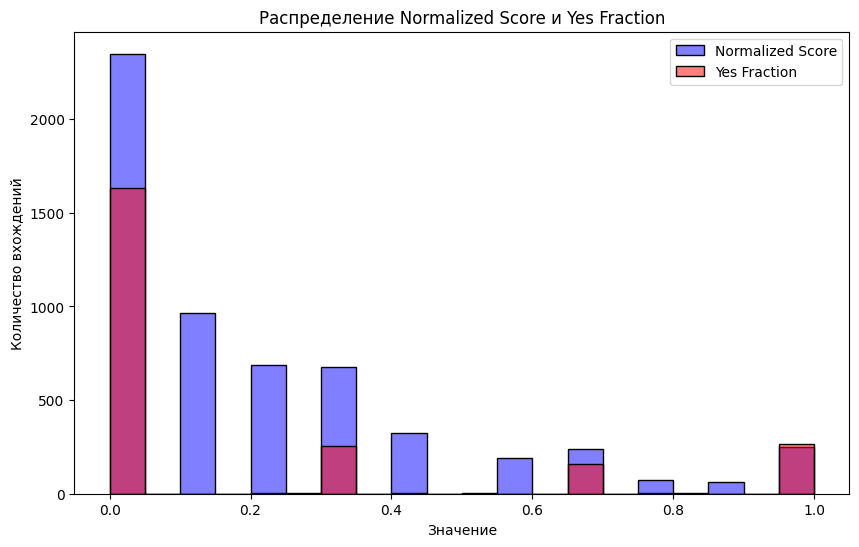

In [24]:
plt.figure(figsize=(10, 6))

# Гистограммы для двух колонок на одном графике
sns.histplot(comb_score_df['normalized_score'], bins=20, kde=False, color='blue', 
             label='Normalized Score', alpha=0.5)
sns.histplot(comb_score_df['yes_fraction'].dropna(), bins=20, kde=False, color='red', 
             label='Yes Fraction', alpha=0.5)

# Настройки графика
plt.xlabel("Значение")
plt.ylabel("Количество вхождений")
plt.title("Распределение Normalized Score и Yes Fraction")
plt.legend()
plt.show()

<img src="https://upload.wikimedia.org/wikipedia/commons/thumb/8/81/Stop_sign.png/240px-Stop_sign.png" align=left width=35, heigth=35>
<div class="alert alert-danger">
Распределения действительно имеют различия (больше по причине того, что эксперты использовали шкалу оценок, а краудсорсеры отвечали ДА/НЕТ). Но на этом графике существенные различия связаны с тем, что ты ошиблась при масштабировании экспертных оценок и привела их к диапазону 0,25-1.</div>

<div class="alert" style="background-color:#ead7f7;color:#8737bf">
    Из графика видно некоторое совпадение оценок экспертов и краудсорсеров. Это является следствием того, что оценка экспертов варьирует от 1 до 4, а краудсорсеры оценивают по принципу да (совпадают) или нет (не совпадают).

</div>

In [25]:
# Функция для вычисления общей оценки
def calculate_common_norm_score(row):
    # Если в столбце yes_fraction (оценка краудсорсеров) стоит NaN, то берем оценку экспертов
    if pd.isna(row['yes_fraction']):
        return row['normalized_score']
    # Если краудсорсеров больше 4, то вес оценки экспертов зададим, равным 0.5, а если меньше - 0.6
    elif row['total'] > 4:
        return 0.5 * row['normalized_score'] + 0.5 * row['yes_fraction']
    else:
        return 0.6 * row['normalized_score'] + 0.4 * row['yes_fraction']

# Применяем функцию к датафрейму
comb_score_df['common_norm_score'] = comb_score_df.apply(calculate_common_norm_score, axis=1)

# Оставляем только нужные столбцы
comb_score_df = comb_score_df[['image', 'description_id', 'common_norm_score']].copy()

# Выводим первые строки итогового датафрейма
comb_score_df.head()

image               description_id  common_norm_score
0  1056338697_4f7d7ce270.jpg  2549968784_39bfbe44f9.jpg#2           0.000000
1  1056338697_4f7d7ce270.jpg  2718495608_d8533e3ac5.jpg#2           0.066667
2  1056338697_4f7d7ce270.jpg  3181701312_70a379ab6e.jpg#2           0.111111
3  1056338697_4f7d7ce270.jpg  3207358897_bfa61fa3c6.jpg#2           0.222222
4  1056338697_4f7d7ce270.jpg  3286822339_5535af6b93.jpg#2           0.111111

<img src="https://upload.wikimedia.org/wikipedia/commons/thumb/8/81/Stop_sign.png/240px-Stop_sign.png" align=left width=35, heigth=35>
<div class="alert alert-danger">
Комментарии не сооветствуют коду.  Я про этот

```
    # Если участников больше 4, то вес оценки экспертов зададим, равным 0.6, а если меньше - 0.7
```
    
    
</div>

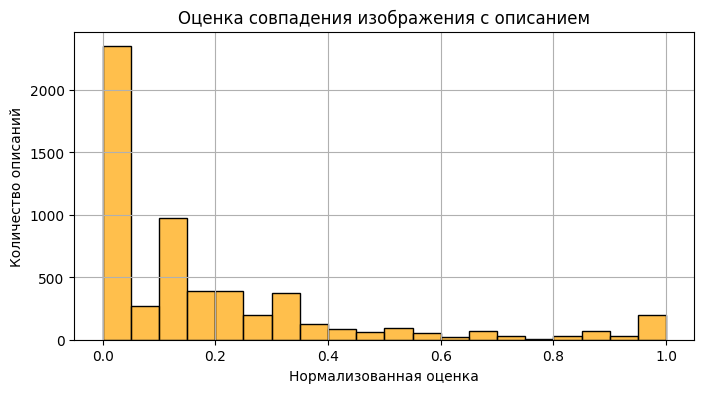

In [26]:
# Гистограмма частоты совпадения изображений с их описанием
plt.figure(figsize=(8, 4))
sns.histplot(comb_score_df['common_norm_score'], kde=False, bins=20, color='orange', alpha=0.7, 
             label='Нормализованная оценка')
plt.title("Оценка совпадения изображения с описанием")
plt.xlabel("Нормализованная оценка")
plt.ylabel("Количество описаний")
plt.grid()
plt.show()

Можно видеть, что большинство изображений имеют оценку ниже 0,5. Полученный датафрейм имеет сильный перекос в сторону оценок меньше 0.5.

### Загрузка тренировочных данных

In [27]:
# Загрузка данных с указанием разделителя и обработкой ошибочных строк
file_path = os.path.join(path_to_prj,'train_dataset.csv')

train_df = pd.read_csv(file_path, sep=',')
    
# Просмотр первых 5 строк
train_df.head(5)

image                     query_id  \
0  1056338697_4f7d7ce270.jpg  2549968784_39bfbe44f9.jpg#2   
1  1262583859_653f1469a9.jpg  2549968784_39bfbe44f9.jpg#2   
2  2447284966_d6bbdb4b6e.jpg  2549968784_39bfbe44f9.jpg#2   
3  2549968784_39bfbe44f9.jpg  2549968784_39bfbe44f9.jpg#2   
4  2621415349_ef1a7e73be.jpg  2549968784_39bfbe44f9.jpg#2   

                                          query_text  
0  A young child is wearing blue goggles and sitt...  
1  A young child is wearing blue goggles and sitt...  
2  A young child is wearing blue goggles and sitt...  
3  A young child is wearing blue goggles and sitt...  
4  A young child is wearing blue goggles and sitt...

In [28]:
n_raw_data = train_df.shape[0] # количество строк в датафрейме до чистки
train_df.shape

(5822, 3)

In [29]:
print(f"Уникальных комбинаций image и query_id: {train_df[['image', 'query_text']].drop_duplicates().shape[0]}")

Уникальных комбинаций image и query_id: 5822


<img src="https://emojigraph.org/media/apple/check-mark-button_2705.png" align=left width=33, heigth=33>
<div class="alert alert-success">
Идея с лемматизацией хороша. Но она очень "дорогая" - хорошая лемматизация занимает время. Кроме того ведь её нужно написать, проверить на ошибки, возможно "утащить в прод"..
    
А между тем лемматизация  нужна нам в двух случаях:  

 - При чистке датасета от детских изображений. 
 - При векторизации.
    
При поиске детских изображений я  считаю возможным упростить себе жизнь - взять возможные словоформы "запрещенных" слов. Как правиль их всего две - единственное и множественное число. 
    
А для вкторизациии делать лемматизацию в нашем случае не нужно. Модель BERT обучалась на обычных, сырых,не лемматизированных текстах.    

    
</div>

<div class="alert" style="background-color:#ead7f7;color:#8737bf">
    <font size="3"><b></b></font>
   
удалена лемматизация

</div>

In [30]:
# Проверим длину слов, чтобы определить, есть ли испорченные строки (отсутствие пробелов между словами)
# Добавление средней длины слова в токене
train_df['avg_word_length'] = train_df['query_text'].apply(
lambda x: sum(len(word) for word in x.split())/len(x.split()) if len(x.split()) >0 else 0)

train_df.describe()

avg_word_length
count      5822.000000
mean          3.744993
std           0.533569
min           2.500000
25%           3.363636
50%           3.714286
75%           4.047619
max           6.700000

Очень длинные слова отсутствуют, следовательно полагаем, что все токены написаны верно

<div class="alert" style="background-color:#ead7f7;color:#8737bf">
    <font size="3"><b>Поиск "плохих" слов, т.е. слов в описании, указывающих на возможность наличия на изображении дейтей до 16 лет</b></font>
</div>

##### Для удаления изображений с плохими словами объединим датафрейм с тренировочными данными и датафрейм с оценками экспертов и краудсорсеров

In [31]:
# Объединение датафреймов по колонкам `image` и 'description_id' (result_df)  и 'image', 'query_id' (train_df)
train_merged_df = train_df.merge(comb_score_df, left_on=['image', 'query_id'], right_on=['image', 'description_id'], how='inner')

# Посмотрим на результат
train_merged_df.head()

image                     query_id  \
0  1056338697_4f7d7ce270.jpg  2549968784_39bfbe44f9.jpg#2   
1  1262583859_653f1469a9.jpg  2549968784_39bfbe44f9.jpg#2   
2  2447284966_d6bbdb4b6e.jpg  2549968784_39bfbe44f9.jpg#2   
3  2549968784_39bfbe44f9.jpg  2549968784_39bfbe44f9.jpg#2   
4  2621415349_ef1a7e73be.jpg  2549968784_39bfbe44f9.jpg#2   

                                          query_text  avg_word_length  \
0  A young child is wearing blue goggles and sitt...           3.5625   
1  A young child is wearing blue goggles and sitt...           3.5625   
2  A young child is wearing blue goggles and sitt...           3.5625   
3  A young child is wearing blue goggles and sitt...           3.5625   
4  A young child is wearing blue goggles and sitt...           3.5625   

                description_id  common_norm_score  
0  2549968784_39bfbe44f9.jpg#2           0.000000  
1  2549968784_39bfbe44f9.jpg#2           0.000000  
2  2549968784_39bfbe44f9.jpg#2           0.133333  
3  2549968784_39bfbe44f9.jpg#2           1.000000  
4  2549968784_39bfbe44f9.jpg#2           0.000000

In [32]:
train_merged_df.shape

(5822, 6)

In [33]:
# Составляем список уникальных слов, которые содержатся в колонке query_text
# Приводим текст к нижнему регистру и разделяем слова
unique_words = set()
train_df["query_text"].dropna().str.lower().str.split().apply(unique_words.update)

# Создаем список отсортированных по алфавиту слов
unique_word_list = sorted(unique_words)

# Печатаем результат
print(unique_word_list)

['"', '&', "'s", ',', '.', '12', '2', '28', '4', '5', '58', ';', 'a', 'about', 'above', 'across', 'action', 'actor', 'adult', 'adults', 'aerial', 'aerodynamically', 'african', 'after', 'against', 'aged', 'ahead', 'aims', 'air', 'airborne', 'airplane', 'albert', 'alert', 'all', 'ally', 'almost', 'alone', 'along', 'alongside', 'among', 'ampitheater', 'an', 'and', 'animal', 'another', 'appear', 'apple', 'approaches', 'approaching', 'are', 'area', 'arizona', 'arm', 'armbands', 'arms', 'around', 'art', 'artist', 'arts', 'as', 'asian', 'asleep', 'assist', 'at', 'attached', 'attempting', 'attempts', 'attentively', 'attire', 'atv', 'audience', 'avoid', 'away', 'awning', 'babies', 'baby', 'back', 'backdrop', 'background', 'backpack', 'backpacks', 'backs', 'backset', 'backstroke', 'backwards', 'backyard', 'bag', 'bagpipe', 'balances', 'balancing', 'bale', 'ball', 'balls', 'band', 'bank', 'bar', 'bare', 'barrels', 'barren', 'barrette', 'barrier', 'bars', 'base', 'baseball', 'baseman', 'basketball

In [34]:
# Из полученного списка выбираем слова, относящиеся к детям до 16 лет
keywords = [
    'babies', 'baby', 'boy', 'boys', 'child', 'children', 'girl', 'girls',
    'infant', 'kid', 'kiddie', 'kids', 'newborn', 'pacifier', 'preschool', 
    'schoolboy', 'schoolgirl', 'students',
    'toddler', 'toddlers', 'toys', 'young', 'youth', 'youths', 'teenage', 'teenagers'
]

<img src="https://upload.wikimedia.org/wikipedia/commons/b/ba/Warning_sign_4.0.png" align=left width=44, heigth=33>
<div class="alert alert-warning">
    
Ты удаляешь комментарии, в которых есть слова, обозначающие детей. Но наша задача убрать изображения, содержащие детей. Есть два способа сделать это:
    
 - Определить список плохих изображений, как изображения удовлетворяющие условиям:
    - Комментарий содержит плохие слова
    - <b>Оценка соответствия комментария и изображения выше порога.</b>
 - Удалить из нашего датасета все пары "изображение/описание" с плохими изображениями.
    
 
И второй, очень красивый способ. Он основан на том, что `query_id` содержит в с себе имя изображения, для которого он был написан (такая пасхалочка от авторов датасета).
    
 - Определить список плохих комментариев
 - У `query_id`  плохих комментариев отрезать два последних символа и получим список плохих изображений.
    
    
    
</div>

<div class="alert" style="background-color:#ead7f7;color:#8737bf">
    <font size="3"><b>Удаление строк из датафрейма с плохими словами</b></font>
    Удаляем только те строки, где в тексте описания встречаются слова, указывающие на возможное присутствие на изображении детей до 16 лет, и объединенная оценка совпадения текста с изображением > 0,5
</div>

In [35]:
# Регулярное выражение для поиска запрещенных слов
pattern = r'\b(?:' + '|'.join(keywords) + r')\b'

# Удаляем строки, где встречается слово из списка и common_norm_score >= 0.5
train_filtered_df = train_merged_df[
        ~(train_merged_df['query_text'].str.contains(pattern, case=False, na=False, regex=True) & 
        (train_merged_df['common_norm_score'] >= 0.5))
        ]

# Вывод датафрейма
train_filtered_df.head()

image                     query_id  \
0  1056338697_4f7d7ce270.jpg  2549968784_39bfbe44f9.jpg#2   
1  1262583859_653f1469a9.jpg  2549968784_39bfbe44f9.jpg#2   
2  2447284966_d6bbdb4b6e.jpg  2549968784_39bfbe44f9.jpg#2   
4  2621415349_ef1a7e73be.jpg  2549968784_39bfbe44f9.jpg#2   
5  3030566410_393c36a6c5.jpg  2549968784_39bfbe44f9.jpg#2   

                                          query_text  avg_word_length  \
0  A young child is wearing blue goggles and sitt...           3.5625   
1  A young child is wearing blue goggles and sitt...           3.5625   
2  A young child is wearing blue goggles and sitt...           3.5625   
4  A young child is wearing blue goggles and sitt...           3.5625   
5  A young child is wearing blue goggles and sitt...           3.5625   

                description_id  common_norm_score  
0  2549968784_39bfbe44f9.jpg#2           0.000000  
1  2549968784_39bfbe44f9.jpg#2           0.000000  
2  2549968784_39bfbe44f9.jpg#2           0.133333  
4  2549968784_39bfbe44f9.jpg#2           0.000000  
5  2549968784_39bfbe44f9.jpg#2           0.266667

In [36]:
# Для дальнейшей работы оставим только нужные столбцы
train_filtered_df = train_filtered_df.drop(['avg_word_length', 'description_id'], axis = 1).copy()
train_filtered_df.head()

image                     query_id  \
0  1056338697_4f7d7ce270.jpg  2549968784_39bfbe44f9.jpg#2   
1  1262583859_653f1469a9.jpg  2549968784_39bfbe44f9.jpg#2   
2  2447284966_d6bbdb4b6e.jpg  2549968784_39bfbe44f9.jpg#2   
4  2621415349_ef1a7e73be.jpg  2549968784_39bfbe44f9.jpg#2   
5  3030566410_393c36a6c5.jpg  2549968784_39bfbe44f9.jpg#2   

                                          query_text  common_norm_score  
0  A young child is wearing blue goggles and sitt...           0.000000  
1  A young child is wearing blue goggles and sitt...           0.000000  
2  A young child is wearing blue goggles and sitt...           0.133333  
4  A young child is wearing blue goggles and sitt...           0.000000  
5  A young child is wearing blue goggles and sitt...           0.266667

In [37]:
train_filtered_df.shape

(5721, 4)

#### Выводы
1. Загружены тренировочные данные, количество строк в которых совпадает с количеством строк в датафрейме оценки экспертов.
2. Все комбинации изображений с соответствующими описаниями являются уникальными, дубликатов нет.
3. Самое длинное слово содержит 11 знаков, артефактов нет.
4. Выполнена предварительная обработка текста.
5. После удаления дисклаймера датафрейи немного сократился до 5721 записей. 

### Обработка текстов помощью BERT (PyTorch)

In [38]:
# Загружаем токенизатор и модель BERT
tokenizer = transformers.BertTokenizer.from_pretrained('bert-base-uncased')
model = transformers.BertModel.from_pretrained('bert-base-uncased')
model.eval()  # Переводим модель в режим оценки

# Токенизация текста и сохранение токенов в новую колонку
train_filtered_df['tokenized_text'] = train_filtered_df['query_text'].apply(
    lambda x: tokenizer.encode(x, add_special_tokens=True)
)

# Паддинг токенов для одинаковой длины
max_len = max(train_filtered_df['tokenized_text'].apply(len))
padded = np.array([i + [0] * (max_len - len(i)) for i in train_filtered_df['tokenized_text']])

# Attention mask
attention_mask = np.where(padded != 0, 1, 0)

# Преобразование текста в векторы с помощью BERT
batch_size_text = 100
text_embeddings = []

for i in tqdm(range((padded.shape[0] + batch_size_text - 1) // batch_size_text), desc="Processing Text Batches"):
    batch = torch.LongTensor(padded[batch_size_text * i: batch_size_text * (i + 1)])
    attention_mask_batch = torch.LongTensor(attention_mask[batch_size_text * i: batch_size_text * (i + 1)])
    
    with torch.no_grad():
        batch_embeddings = model(batch, attention_mask=attention_mask_batch)
    
    # Сохраняем векторы CLS токена
    text_embeddings.append(batch_embeddings[0][:, 0, :].numpy())

# Объединяем все батчи в один массив
text_embeddings = np.concatenate(text_embeddings, axis=0)

# Добавляем векторы в DataFrame
train_filtered_df['text_embeddings'] = list(text_embeddings)

Processing Text Batches: 100%|██████████████████| 58/58 [00:53<00:00,  1.09it/s]


In [39]:
print(f"Форма эмбеддингов изображений: {text_embeddings.shape}")

Форма эмбеддингов изображений: (5721, 768)


In [40]:
train_filtered_df.sample(5)

image                     query_id  \
4855   979383193_0a542a059d.jpg  3585598356_8ce815bbb9.jpg#2   
4599  3498327617_d2e3db3ee3.jpg  2704934519_457dc38986.jpg#2   
2514   997722733_0cb5439472.jpg  3375070563_3c290a7991.jpg#2   
5164  2573625591_70291c894a.jpg   154871781_ae77696b77.jpg#2   
5379  2844018783_524b08e5aa.jpg  2447284966_d6bbdb4b6e.jpg#2   

                                             query_text  common_norm_score  \
4855  two woman are showing different facial express...           0.000000   
4599      A girl whipping water from her hair in a lake           0.200000   
2514         A white birds lands swiftly in the water .           0.000000   
5164  Two boys have made a goal out of two jackets i...           0.000000   
5379  A young boy in a team sweatshirt is in a sport...           0.222222   

                                         tokenized_text  \
4855  [101, 2048, 2450, 2024, 4760, 2367, 13268, 114...   
4599  [101, 1037, 2611, 23016, 2300, 2013, 2014, 260...   
2514  [101, 1037, 2317, 5055, 4915, 12128, 1999, 199...   
5164  [101, 2048, 3337, 2031, 2081, 1037, 3125, 2041...   
5379  [101, 1037, 2402, 2879, 1999, 1037, 2136, 2809...   

                                        text_embeddings  
4855  [-0.3142702, 0.30073866, -0.30362222, -0.20591...  
4599  [0.13103096, 0.022919502, -0.7229482, 0.437955...  
2514  [-0.092702426, 0.39325547, -0.042328034, 0.054...  
5164  [-0.2561456, 0.04104042, -0.50601476, 0.293501...  
5379  [0.029690746, 0.25474003, -0.5382689, 0.201868...

<img src="https://emojigraph.org/media/apple/check-mark-button_2705.png" align=left width=33, heigth=33>
<div class="alert alert-success">
Отлично,полученные векторные представления для текстов описаний с помощью BERT </div>

### Обработка изображений

<img src="https://upload.wikimedia.org/wikipedia/commons/b/ba/Warning_sign_4.0.png" align=left width=44, heigth=33>
<div class="alert alert-warning">
В этом раздеел есть проблема и заключается она в следующем. Для векторизации ты использовала BERT, основанный на Pytorch.  А для векторизации изображений используешь Keras.  Поддержка двух DL фреймворков - это будет ад для девопса. Поэтому хорошей практикой является использование одного фреймворка в одном проекте. 

Я бы посоветовал воспользоваться pytorch и Resnet18, тем более что в теории к проекту были отличные примеры.

</div>

<div class="alert" style="background-color:#ead7f7;color:#8737bf">
    <font size="3"><b>Использование  Resnet18 и PyTorch </b></font>
   
Для векторизации изображений использованы PyTorch и Resnet18

</div>

In [41]:
# Указываем директорию с изображениями
image_dir = os.path.join(path_to_prj, 'train_images')
batch_size_img = 32

# Определяем трансформации для изображений (размер 224x224, нормализация для ImageNet)
transform = transforms.Compose([
    transforms.Resize((224, 224)),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406],
                         std=[0.229, 0.224, 0.225])
])

# Создаем кастомный Dataset для загрузки изображений
class ImageDataset(Dataset):
    def __init__(self, dataframe, img_dir, transform=None):
        self.dataframe = dataframe
        self.img_dir = img_dir
        self.transform = transform
        
    def __len__(self):
        return len(self.dataframe)
    
    def __getitem__(self, idx):
        # Получаем имя файла изображения из столбца "image"
        img_name = self.dataframe.iloc[idx]['image']
        img_path = os.path.join(self.img_dir, img_name)
        image = Image.open(img_path).convert('RGB') 
        if self.transform:
            image = self.transform(image)
        return image

# Создаем экземпляр Dataset и DataLoader
dataset = ImageDataset(dataframe=train_filtered_df, img_dir=image_dir, transform=transform)
dataloader = DataLoader(dataset, batch_size=batch_size_img, shuffle=False)

# Загружаем предобученную модель ResNet18
resnet18 = models.resnet18(pretrained=True)
resnet18.eval()  # переводим модель в режим оценки

# Извлекаем все слои, кроме последнего (fully connected), чтобы получить вектор признаков
feature_extractor = nn.Sequential(*list(resnet18.children())[:-1])
feature_extractor.eval()

# Переносим модель на устройство (GPU, если доступно)
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
feature_extractor.to(device)

# Извлекаем эмбеддинги для изображений
image_embeddings = []
with torch.no_grad():
    for i, batch in enumerate(tqdm(dataloader, total=len(dataloader), desc="Processing Image Batches")):
        batch = batch.to(device)
        features = feature_extractor(batch)  # Выход имеет форму (batch_size, 512, 1, 1)
        features = features.view(features.size(0), -1)  # Приводим к форме (batch_size, 512)
        image_embeddings.append(features.cpu().numpy())

# Объединяем все батчи в один массив
image_embeddings = np.concatenate(image_embeddings, axis=0)
print(f"Форма эмбеддингов изображений: {image_embeddings.shape}")

# Добавляем векторы изображений в DataFrame (если требуется)
train_filtered_df['image_embeddings'] = list(image_embeddings)

/Users/naziaignatenko/anaconda3/lib/python3.11/site-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/Users/naziaignatenko/anaconda3/lib/python3.11/site-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet18_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet18_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)
Processing Image Batches: 100%|███████████████| 179/179 [02:39<00:00,  1.12it/s]

Форма эмбеддингов изображений: (5721, 512)


<img src="https://upload.wikimedia.org/wikipedia/commons/thumb/8/81/Stop_sign.png/240px-Stop_sign.png" align=left width=35, heigth=35>
<div class="alert alert-danger">
Давай уберем нектуальный код.
    
Выше у тебя создается датагенератор datagen (и я уже собирался оставить красный комментарий, с пояснениями что аугментация здесь не нужна).
    
Но ниже ты создаешь еще один датагенератор (правильный) с таким же именем. Зачем тогда путать читателя?    


</div>

<div class="alert" style="background-color:#ead7f7;color:#8737bf">
    Неактуальный код удален
</div>

<img src="https://emojigraph.org/media/apple/check-mark-button_2705.png" align=left width=33, heigth=33>
<div class="alert alert-success">
 Отлично, вектра для изображений получены👍 </div>

In [42]:
# Смотрим,что получилось
train_filtered_df.head()

image                     query_id  \
0  1056338697_4f7d7ce270.jpg  2549968784_39bfbe44f9.jpg#2   
1  1262583859_653f1469a9.jpg  2549968784_39bfbe44f9.jpg#2   
2  2447284966_d6bbdb4b6e.jpg  2549968784_39bfbe44f9.jpg#2   
4  2621415349_ef1a7e73be.jpg  2549968784_39bfbe44f9.jpg#2   
5  3030566410_393c36a6c5.jpg  2549968784_39bfbe44f9.jpg#2   

                                          query_text  common_norm_score  \
0  A young child is wearing blue goggles and sitt...           0.000000   
1  A young child is wearing blue goggles and sitt...           0.000000   
2  A young child is wearing blue goggles and sitt...           0.133333   
4  A young child is wearing blue goggles and sitt...           0.000000   
5  A young child is wearing blue goggles and sitt...           0.266667   

                                      tokenized_text  \
0  [101, 1037, 2402, 2775, 2003, 4147, 2630, 2175...   
1  [101, 1037, 2402, 2775, 2003, 4147, 2630, 2175...   
2  [101, 1037, 2402, 2775, 2003, 4147, 2630, 2175...   
4  [101, 1037, 2402, 2775, 2003, 4147, 2630, 2175...   
5  [101, 1037, 2402, 2775, 2003, 4147, 2630, 2175...   

                                     text_embeddings  \
0  [-0.047877427, 0.0514149, -0.27281457, -0.0722...   
1  [-0.047877427, 0.0514149, -0.27281457, -0.0722...   
2  [-0.047877427, 0.0514149, -0.27281457, -0.0722...   
4  [-0.047877427, 0.0514149, -0.27281457, -0.0722...   
5  [-0.047877427, 0.0514149, -0.27281457, -0.0722...   

                                    image_embeddings  
0  [0.80274457, 3.3568928, 2.5148544, 0.94254076,...  
1  [0.23398887, 1.4876033, 1.3025213, 1.0698885, ...  
2  [0.02307533, 1.6738847, 1.9254303, 4.671309, 1...  
4  [2.4115796, 0.9138509, 1.2702501, 0.51199144, ...  
5  [0.7964823, 0.9441546, 0.17553292, 2.71199, 0....

<img src="https://emojigraph.org/media/apple/check-mark-button_2705.png" align=left width=33, heigth=33>
<div class="alert alert-success">
 Вектора, полученные из текста и изображения объеденены между собой и с оценками </div>

После объединения тренировочных данных с данными по оценке изображений и текстов, получаем датафрейм с количеством строк 4275. 

### Обучение модели

In [43]:
# Создание финального датасета, с которым будем работать
final_train_df = train_filtered_df[['image', 'query_id', 
                                    'text_embeddings', 
                                    'image_embeddings', 
                                    'common_norm_score']].copy()
final_train_df.shape

(5721, 5)

<img src="https://upload.wikimedia.org/wikipedia/commons/b/ba/Warning_sign_4.0.png" align=left width=44, heigth=33>
<div class="alert alert-warning">

Авторы проекта предполагали, что мы будем решать задачу регрессии, а не классификации. Вот цитата из описания проекта
    
```
Создайте модель, которая покажет близость двух векторов. Модель должна принимать на вход конкатенированный вектор, состоящий из векторов описания и изображений, и предсказывать итоговую оценку экспертов.    
    
```    

Ты решила пойти путем решения задачи классификации. В принципе в этом нет ничего страшного, но вот только переходя от непрерывных к бинарным оценкам мы теряем достаточно много информации. В частности все нюансы, которые были в оценках экспертов теперь "смазываются". И было бы лучше тогда уже использовать все крауд оценки, и работатьс датасетом на 50К (все равно краудсорсеры отвечали на вопрос ДА или НЕТ, т.е. та же самая задача бинарной классификации).    
    
---------------
    
Ну и ты должна понимать, что на этапе инференса наша задача выбрать изображение, которое не просто получит 1, а в котром  наша модель будет максимально уверена, а значит вместо predict нужно будет использовать predict_proba и выбирать изображение с максимальной уверенностью.    
    
</div>

<div class="alert" style="background-color:#ead7f7;color:#8737bf">
    Используем непрерывные оценки
</div>

In [44]:
# Разделение данных
splitter = GroupShuffleSplit(n_splits=1, test_size=0.2, random_state=42)
train_idx, val_idx = next(splitter.split(
    final_train_df, 
    groups=final_train_df['image'] 
))

# Создание тренировочного и валидационного наборов
tr_df = final_train_df.iloc[train_idx].reset_index(drop=True)
val_df = final_train_df.iloc[val_idx].reset_index(drop=True)

print(f"Размер тренировочного набора: {len(tr_df)}")
print(f"Размер валидационного набора: {len(val_df)}")

Размер тренировочного набора: 4589
Размер валидационного набора: 1132


<img src="https://upload.wikimedia.org/wikipedia/commons/b/ba/Warning_sign_4.0.png" align=left width=44, heigth=33>
<div class="alert alert-warning">
На мой взгляд шаг неочевидный. 

С одной стороны врядли будет сильно хуже, если применить PCA, хотя есть вероятность потерять часть информации.
 
С другой стороны, уменьшение размерности это совсем не обязательно, ведь мы планируем конкатенировать вектора, для этого они не обязательно должны быть одной размерности. 
    
----------
    
Еще одна причина - возможно нарушение структуры эмбеддингов (о чем я пишу в следующем коммернтарии)    
</div>

<div class="alert" style="background-color:#ead7f7;color:#8737bf">
    Для обучения с непрерывными оценками оценим модели Линейной регрессии и нейронной сети
</div>

<img src="https://upload.wikimedia.org/wikipedia/commons/b/ba/Warning_sign_4.0.png" align=left width=44, heigth=33>
<div class="alert alert-warning">
Обычно перед линейной регрессией и нейронкой я настаиваю на масштабировании  признаков, т.к. это может помочь модели лучше сходиться.  И для любого классического проекта (в том числе выпускного) это строгая рекомендаци.
    
Но в нашем проекте это не очень однозначно. Да, с одной стороны модель будет уделать одинаковое влияние обоим признакам, да и учиться будет быстрее.    

Но есть и минусы масштабирования:

 - Нарушение структуры эмбеддингов – смысл и семантические связи в эмбеддингах могут быть изменены.
 - Потеря важности признаков – относительная важность признаков из разных моделей (ResNet и BERT) может быть потеряна.

Рекомендация:

Попробуй оба подхода (с масштабированием и без) и сравни результаты, чтобы выбрать оптимальный вариант.    
    

</div>

<img src="https://emojigraph.org/media/apple/check-mark-button_2705.png" align=left width=33, heigth=33>
<div class="alert alert-success">
Да, вижу что ты получила оценку для разных моделей.</div>

<img src="https://upload.wikimedia.org/wikipedia/commons/b/ba/Warning_sign_4.0.png" align=left width=44, heigth=33>
<div class="alert alert-warning">
Формально оценки получены, но сама логика (параллельная оценка моделей внутри цикла по кросс-валидации) выглядит неожиданной. Как правило наоборот, настройка каждой модели (включая гиперпараметры) производится отдельно.

Например, для той же нейронки, если стремиться "выжать из неё максимум", а не просто обучить "для галочки", нужно провести достаточно много пробных запусков и обучений, прежде чем получится оптимальный вариант.    
</div>

<img src="https://upload.wikimedia.org/wikipedia/commons/b/ba/Warning_sign_4.0.png" align=left width=44, heigth=33>
<div class="alert alert-warning">
Возможно ты воспринимаешь "количество эпох" обучения нейронной сети как гиперпараметр "спущеный с верху". Т.е. устанавливаем параметры сети, запускаем обучение и смотрим на результат.
    
В случае с нейронками логика ипользования немного отличается от того, к чему мы привыкли в классических моделях. Здесь лучше работать по другой логике:
    
 - оределилили архитектуру, создали модель
 - начинаем её учить. и учим пока метрика на валидационной выборке улучшается.  Наблюдая в динамике метрики на обучающей и валидационной выборках.
 - если вдруг метрика на обучающей выборке перестала снижаться, можно попробовать уменьшить шаг обучения (например в 10 раз) и продолжить обучение модели.
    
В любом случае полезно обучать модель пока метрика на валидации улучшается. Наша цель - оптимальное состояние модели, при котором модель хорошо находит законмоерности в данных, но еще не переобучилась.
        
После того, как закончили обучение смотрим на логи, анализируем, чего модели не хватило, меняем архитектуру и запускаем обучение по новой.    
    

    

    
</div>

<img src="https://emojigraph.org/media/apple/check-mark-button_2705.png" align=left width=33, heigth=33>
<div class="alert alert-success">


Для осознанной настройки нейронки важно понимать, как менять её архитектуру (усложнять и уменьшать регуляризацию? уменьшать шаг обучения? усиливать регуляризацию?). Для того чтобы принять эти  решения мало видеть только конечную цифру, важно понимать, чего модели не хватает чтобы метрика стала лучше.
    
    
Вот типичные  проблемы, которые можно выявить  анализируя графики и пути их решения:

<b>Недообучение (Underfitting)</b>
  Признаки: Высокие значения потерь и низкая точность как на обучающей, так и на валидационной выборке. Графики потерь не снижаются (или снижаются  недостаточно).
  
  Решения:
    
 - Увеличение сложности модели (добавление слоев, увеличение числа нейронов).
 - Использование более сложных моделей, таких как более глубокие нейронные сети.
 - Увеличение количества эпох обучения.

<b>Переобучение (Overfitting)</b>
  Признаки: Значительное снижение потерь и увеличение точности на обучающей выборке, но высокие потери и низкая точность на валидационной выборке. Графики начинают расходиться после некоторого количества эпох.
    
 Решения:
  - Регуляризация (L1, L2 регуляризация).
  - Dropout (добавление Dropout слоев).
  - Уменьшение сложности модели (уменьшение числа слоев или нейронов).
  - Использование аугментации данных для увеличения разнообразия данных.
  - Раннее завершение обучения (Early Stopping) на основе валидационной ошибки.

<b>Плохой выбор гиперпараметров</b>
 Признаки: Нестабильные графики потерь и точности (большие колебания).
 
 Решения:
  - Настройка скорости обучения (learning rate).
  - Оптимизация размера батча (batch size).
  - Попробовать другие оптимизаторы (например, Adam, SGD с различными параметрами).    

</div>

<div class="alert" style="background-color:#ead7f7;color:#8737bf">
    Проверим работу нейронной сети на немасштабированных и масштабированных данных
</div>

In [45]:
# Преобразуем целевой таргет с помощью log1p (log(x + 1), чтобы избежать проблем с нулями)
#tr_df['log_target'] = np.log1p(tr_df['common_norm_score'])  # Преобразуем для обучения

In [46]:
# Подготовка данных
def scale_data(tr_df, val_df, use_scaling=True):
    scaler = StandardScaler()
    X_train = scaler.fit_transform(np.vstack(tr_df[['text_embeddings', 'image_embeddings']].apply(np.hstack, axis=1)))
    X_val = scaler.transform(np.vstack(val_df[['text_embeddings', 'image_embeddings']].apply(np.hstack, axis=1)))

    y_train = tr_df['common_norm_score'].values
    y_val = val_df['common_norm_score'].values

    return torch.tensor(X_train, dtype=torch.float32).to(device), torch.tensor(X_val, dtype=torch.float32).to(device), \
           torch.tensor(y_train, dtype=torch.float32).to(device), torch.tensor(y_val, dtype=torch.float32).to(device)

In [47]:
# Создание Dataset для текста и изображений
class TextImageDataset(Dataset):
    def __init__(self, X_data, y_data):
        self.X_data = X_data
        self.y_data = y_data
    
    def __len__(self):
        return len(self.X_data)
    
    def __getitem__(self, idx):
        # Возвращаем и признаки, и целевой таргет
        return self.X_data[idx], self.y_data[idx]

# Функция создания DataLoader
def create_dataloader(X_data, y_data, batch_size=32, shuffle=True):
    dataset = TextImageDataset(X_data, y_data)  # Используем TextImageDataset
    return DataLoader(dataset, batch_size=batch_size, shuffle=shuffle)


In [48]:
# Модель для предсказания
class TextImageRegressorBase(nn.Module):
    def __init__(self, activation_function, dropout_rate=0.3):
        super(TextImageRegressorBase, self).__init__()
        self.fc = nn.Sequential(
            nn.Linear(1280, 1024),
            activation_function(),
            nn.BatchNorm1d(1024),
            nn.Dropout(dropout_rate),
            nn.Linear(1024, 512),
            activation_function(),
            nn.BatchNorm1d(512),
            nn.Dropout(dropout_rate),
            nn.Linear(512, 1)
        )

    def forward(self, x):
        return self.fc(x).squeeze(1)

# Функция для получения активации
def get_activation_function(name):
    if name == "GELU":
        return nn.GELU
    elif name == "Swish":
        return Swish
    elif name == "ReLU":
        return nn.ReLU
    else:
        raise ValueError(f"Unknown activation function: {name}")
# Swish (сглаженная активация)
class Swish(nn.Module):
    def forward(self, x):
        return x * torch.sigmoid(x)  # Реализация Swish


In [49]:
# Функция обучения модели с ранней остановкой
def train_model(model, train_loader, val_loader, epochs=20, lr=1e-4, patience=5):
    optimizer = optim.AdamW(model.parameters(), lr=lr)
    criterion = nn.HuberLoss(delta=1.0)

    best_val_loss = float("inf")
    counter = 0

    train_losses, val_losses = [], []

    # Генерация уникального имени для весов модели на основе текущей даты/времени
    model_name = f"best_text_image_model_{int(time.time())}.pth"

    for epoch in range(epochs):
        model.train()
        epoch_loss = 0
        for batch_X, batch_y in train_loader:
            optimizer.zero_grad()
            predictions = model(batch_X)
            loss = criterion(predictions, batch_y)
            loss.backward()
            optimizer.step()
            epoch_loss += loss.item()

        model.eval()
        val_loss = 0
        with torch.no_grad():
            for batch_X, batch_y in val_loader:
                predictions = model(batch_X)
                loss = criterion(predictions, batch_y)
                val_loss += loss.item()

        train_losses.append(epoch_loss / len(train_loader))
        val_losses.append(val_loss / len(val_loader))

        print(f"Epoch {epoch+1}/{epochs} | Train Loss: {train_losses[-1]:.4f} | Val Loss: {val_losses[-1]:.4f}")

        # Ранняя остановка, чтобы исключить переобучение
        if val_losses[-1] < best_val_loss:
            best_val_loss = val_losses[-1]
            counter = 0
            torch.save(model.state_dict(), model_name)
        else:
            counter += 1
            if counter >= patience:
                print(f"Early stopping at epoch {epoch+1}")
                break

    return train_losses, val_losses, model_name

In [50]:
# Функция оценки модели
def evaluate_model(model, X_val, y_val, model_name):
    model.load_state_dict(torch.load(model_name))
    model.eval()

    with torch.no_grad():
        y_pred = model(X_val).cpu().numpy()

    mse = mean_squared_error(y_val.cpu().numpy(), y_pred)
    mae = mean_absolute_error(y_val.cpu().numpy(), y_pred)
    r2 = r2_score(y_val.cpu().numpy(), y_pred)

    print(f"\nMSE: {mse:.4f}")
    print(f"MAE: {mae:.4f}")
    print(f"R2: {r2:.4f}")

    return mse, mae, r2


In [51]:
# Функция выбора лучшей модели
def train_and_select_best_model():
    activation_functions = ["GELU", "Swish", "ReLU"]
    best_model = None
    best_mse = float('inf')
    best_model_name = ""

    for activation in activation_functions:
        print(f"Training model with {activation} activation function...")

        # Получаем функцию активации
        activation_function = get_activation_function(activation)

        # Инициализируем модель
        model = TextImageRegressorBase(activation_function).to(device)

        # Масштабируем данные
        X_train_scaled, X_val_scaled, y_train, y_val = scale_data(tr_df, val_df, use_scaling=True)

        # Создаем DataLoader
        train_loader_scaled = create_dataloader(X_train_scaled, y_train)  # Передаем X_train_scaled и y_train
        val_loader_scaled = create_dataloader(
                                            X_val_scaled, 
                                            y_val, 
                                            shuffle=False
                                            )  # Передаем X_val_scaled и y_val

        # Обучаем модель
        train_losses, val_losses, model_name = train_model(model, train_loader_scaled, val_loader_scaled)

        # Оцениваем модель
        mse, mae, r2 = evaluate_model(model, X_val_scaled, y_val, model_name)

        # Выбираем модель с наименьшим MSE
        if mse < best_mse:
            best_mse = mse
            best_model = model
            best_model_name = model_name

        # Визуализация кривых потерь
        plot_loss_curves(train_losses, val_losses)

    print(f"\nBest Model: {best_model_name}")
    return best_model, best_model_name

In [52]:
# Функция для визуализации кривых потерь
def plot_loss_curves(train_losses, val_losses):
    plt.figure(figsize=(10, 5))
    plt.plot(train_losses, label="Train Loss")
    plt.plot(val_losses, label="Val Loss")
    plt.xlabel("Epochs")
    plt.ylabel("Loss")
    plt.legend()
    plt.title("Loss Curves")
    plt.show()

Training model with GELU activation function...
Epoch 1/20 | Train Loss: 0.1894 | Val Loss: 0.0604
Epoch 2/20 | Train Loss: 0.1183 | Val Loss: 0.0444
Epoch 3/20 | Train Loss: 0.0919 | Val Loss: 0.0394
Epoch 4/20 | Train Loss: 0.0745 | Val Loss: 0.0353
Epoch 5/20 | Train Loss: 0.0606 | Val Loss: 0.0284
Epoch 6/20 | Train Loss: 0.0523 | Val Loss: 0.0280
Epoch 7/20 | Train Loss: 0.0435 | Val Loss: 0.0254
Epoch 8/20 | Train Loss: 0.0385 | Val Loss: 0.0236
Epoch 9/20 | Train Loss: 0.0328 | Val Loss: 0.0218
Epoch 10/20 | Train Loss: 0.0290 | Val Loss: 0.0219
Epoch 11/20 | Train Loss: 0.0258 | Val Loss: 0.0217
Epoch 12/20 | Train Loss: 0.0230 | Val Loss: 0.0216
Epoch 13/20 | Train Loss: 0.0217 | Val Loss: 0.0212
Epoch 14/20 | Train Loss: 0.0201 | Val Loss: 0.0208
Epoch 15/20 | Train Loss: 0.0187 | Val Loss: 0.0206
Epoch 16/20 | Train Loss: 0.0170 | Val Loss: 0.0206
Epoch 17/20 | Train Loss: 0.0160 | Val Loss: 0.0200
Epoch 18/20 | Train Loss: 0.0147 | Val Loss: 0.0204
Epoch 19/20 | Train Loss:

/var/folders/sl/_znbsp5d1qbbb959w_qdgr980000gn/T/ipykernel_4111/2516689170.py:3: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  model.load_state_dict(torch.load(model_name))


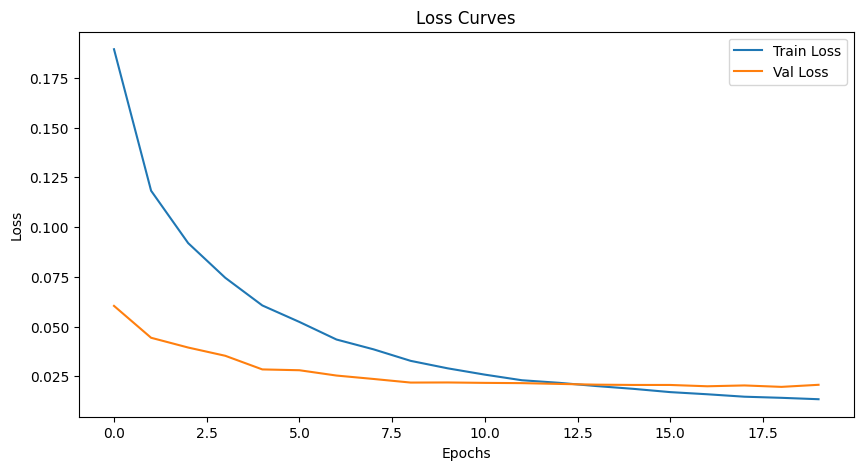

Training model with Swish activation function...
Epoch 1/20 | Train Loss: 0.1714 | Val Loss: 0.0516
Epoch 2/20 | Train Loss: 0.1064 | Val Loss: 0.0351
Epoch 3/20 | Train Loss: 0.0878 | Val Loss: 0.0309
Epoch 4/20 | Train Loss: 0.0707 | Val Loss: 0.0311
Epoch 5/20 | Train Loss: 0.0585 | Val Loss: 0.0263
Epoch 6/20 | Train Loss: 0.0527 | Val Loss: 0.0272
Epoch 7/20 | Train Loss: 0.0459 | Val Loss: 0.0238
Epoch 8/20 | Train Loss: 0.0389 | Val Loss: 0.0232
Epoch 9/20 | Train Loss: 0.0342 | Val Loss: 0.0224
Epoch 10/20 | Train Loss: 0.0301 | Val Loss: 0.0209
Epoch 11/20 | Train Loss: 0.0277 | Val Loss: 0.0212
Epoch 12/20 | Train Loss: 0.0252 | Val Loss: 0.0204
Epoch 13/20 | Train Loss: 0.0235 | Val Loss: 0.0209
Epoch 14/20 | Train Loss: 0.0212 | Val Loss: 0.0199
Epoch 15/20 | Train Loss: 0.0197 | Val Loss: 0.0204
Epoch 16/20 | Train Loss: 0.0185 | Val Loss: 0.0196
Epoch 17/20 | Train Loss: 0.0182 | Val Loss: 0.0199
Epoch 18/20 | Train Loss: 0.0171 | Val Loss: 0.0201
Epoch 19/20 | Train Loss

/var/folders/sl/_znbsp5d1qbbb959w_qdgr980000gn/T/ipykernel_4111/2516689170.py:3: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  model.load_state_dict(torch.load(model_name))


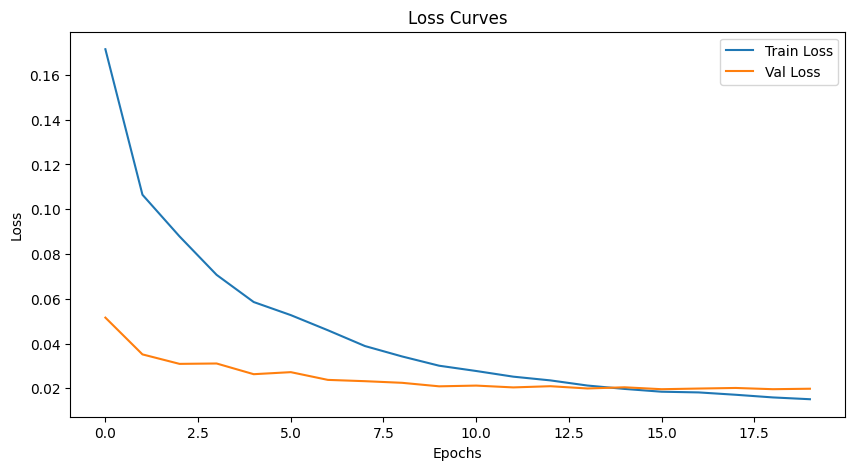

Training model with ReLU activation function...
Epoch 1/20 | Train Loss: 0.1717 | Val Loss: 0.0568
Epoch 2/20 | Train Loss: 0.1090 | Val Loss: 0.0471
Epoch 3/20 | Train Loss: 0.0843 | Val Loss: 0.0401
Epoch 4/20 | Train Loss: 0.0672 | Val Loss: 0.0331
Epoch 5/20 | Train Loss: 0.0570 | Val Loss: 0.0304
Epoch 6/20 | Train Loss: 0.0450 | Val Loss: 0.0276
Epoch 7/20 | Train Loss: 0.0402 | Val Loss: 0.0249
Epoch 8/20 | Train Loss: 0.0346 | Val Loss: 0.0237
Epoch 9/20 | Train Loss: 0.0304 | Val Loss: 0.0224
Epoch 10/20 | Train Loss: 0.0271 | Val Loss: 0.0223
Epoch 11/20 | Train Loss: 0.0237 | Val Loss: 0.0221
Epoch 12/20 | Train Loss: 0.0218 | Val Loss: 0.0212
Epoch 13/20 | Train Loss: 0.0199 | Val Loss: 0.0209
Epoch 14/20 | Train Loss: 0.0179 | Val Loss: 0.0212
Epoch 15/20 | Train Loss: 0.0161 | Val Loss: 0.0207
Epoch 16/20 | Train Loss: 0.0151 | Val Loss: 0.0204
Epoch 17/20 | Train Loss: 0.0142 | Val Loss: 0.0207
Epoch 18/20 | Train Loss: 0.0139 | Val Loss: 0.0207
Epoch 19/20 | Train Loss:

/var/folders/sl/_znbsp5d1qbbb959w_qdgr980000gn/T/ipykernel_4111/2516689170.py:3: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  model.load_state_dict(torch.load(model_name))


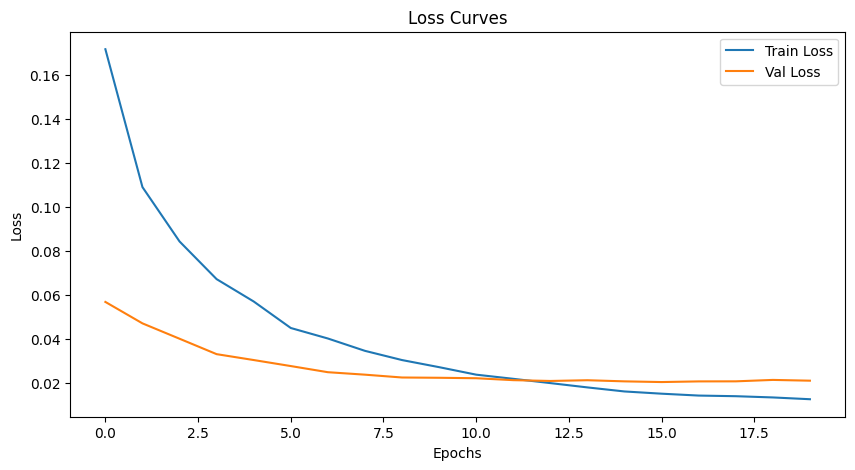


Best Model: best_text_image_model_1739519504.pth


In [53]:
# Запуск процесса выбора лучшей модели
best_model, best_model_name = train_and_select_best_model()

### Вывод

Масштабирование улучшило все метрики.
Для дальнейшего улучшения модели используем масштабирование данных.

### Посмотрим как работает LinearRegression

In [54]:
from sklearn.linear_model import LinearRegression

# Масштабируем данные
X_train_scaled, X_val_scaled, y_train, y_val = scale_data(tr_df, val_df, use_scaling=True)

# Обучаем линейную регрессию
lin_reg = LinearRegression()
lin_reg.fit(X_train_scaled.cpu().numpy(), y_train.cpu().numpy())

# Предсказываем
y_pred_linreg = lin_reg.predict(X_val_scaled.cpu().numpy())

# Оцениваем
mse_linreg = mean_squared_error(y_val.cpu().numpy(), y_pred_linreg)
mae_linreg = mean_absolute_error(y_val.cpu().numpy(), y_pred_linreg)
r2_linreg = r2_score(y_val.cpu().numpy(), y_pred_linreg)

# Выводим результаты
print("\n Результаты линейной регрессии:")
print(f"MSE: {mse_linreg:.4f}")
print(f"MAE: {mae_linreg:.4f}")
print(f"R2 : {r2_linreg:.4f}")


 Результаты линейной регрессии:
MSE: 0.0801
MAE: 0.2167
R2 : -0.4773


### Вывод

Линейная регрессия показала очень плохие результаты.

Возможные причины:
1.	Взаимосвязь между текстом и изображением нелинейная
2.	Линейная модель не может уловить эти зависимости

Вывод: нейросеть (даже простая) значительно лучше справляется с задачей.

### Обработка тестовых данных

<img src="https://upload.wikimedia.org/wikipedia/commons/thumb/8/81/Stop_sign.png/240px-Stop_sign.png" align=left width=35, heigth=35>
<div class="alert alert-danger">
В процессе тестирования ты показываешь просто шикарное качество угадывания картинок. Все изображения идеально соответствуют описаниям.
    
Но по опыту работы с этим проектом скажу тебе, что достигается это не потому, что модель такая хорошая, а потому что в тестовом датасете все изображения идеально подходят друг другу. А твой выбор ограничен только парами из тестового датасета.
    
Поэтому  я попрошу тебя немного переделать логику инференса.
    
Во первых, нужно заранее векторизовать 100 уникальных тестовых изображений.    
    
Далее нужно написать функцию, способную искать изображение по тексту для одного описания. Функция должна уметь работать с любым текстовым описанием.

Что должна делаь функция
    
   - Получать текст
   - Возвращать картинку и метрику близости.
   - Выдавать дисклеймер если запрос некорректный
    
Под капотом функция должна векторизовать полученный текст, и с помощью модели получить предсказание для 100 пар (вектор описания + вектор изображения), где вектор описания мы получили только что, а 100 векторов изображений получили заранее.
    
И дальше ищем изображение, для которого модель покажет максимальную метрику.
    
    
    
---
    
 А затем нужно 10 раз применить функцию к 10 случайным запросам. 
    
И не пугайся, если вдруг ты увидишь, что качества угадывания модели  близкое к рандомному угадыванию. К сожалению такое случается, но зато мы будем четко понимать, что функции для инференса работают корректно,  а вот модель "подкачала".    
    
.</div>

In [55]:
# Загрузка данных с указанием разделителя и обработкой ошибочных строк
file_path = os.path.join(path_to_prj, 'test_queries.csv')

test_df = pd.read_csv(file_path, 
                      sep='|', 
                      index_col=0  # Не считывать первый столбец как индекс
                     )

# Просмотр первых 5 строк
test_df.head(5)

query_id  \
0  1177994172_10d143cb8d.jpg#0   
1  1177994172_10d143cb8d.jpg#1   
2  1177994172_10d143cb8d.jpg#2   
3  1177994172_10d143cb8d.jpg#3   
4  1177994172_10d143cb8d.jpg#4   

                                          query_text  \
0  Two blonde boys , one in a camouflage shirt an...   
1  Two boys are squirting water guns at each other .   
2            Two boys spraying each other with water   
3  Two children wearing jeans squirt water at eac...   
4  Two young boys are squirting water at each oth...   

                       image  
0  1177994172_10d143cb8d.jpg  
1  1177994172_10d143cb8d.jpg  
2  1177994172_10d143cb8d.jpg  
3  1177994172_10d143cb8d.jpg  
4  1177994172_10d143cb8d.jpg

In [56]:
test_df.shape

(500, 3)

In [57]:
len(test_df['image'].unique())

100

### Создаем эмбединги тестовых изображений

In [58]:
test_images = test_df['image'].unique() #[:100]  # Берем 100 уникальных изображений

# Директория с изображениями
image_test_dir =  os.path.join(path_to_prj, 'test_images')

# Dataset
class ImageDataset(Dataset):
    def __init__(self, dataframe, img_dir, transform=None):
        self.dataframe = dataframe
        self.img_dir = img_dir
        self.transform = transform
        
    def __len__(self):
        return len(self.dataframe)
    
    def __getitem__(self, idx):
        img_name = self.dataframe.iloc[idx]['image']
        img_path = os.path.join(self.img_dir, img_name)
        
        image = Image.open(img_path).convert('RGB')
        if self.transform:
            image = self.transform(image)
            
        return image, img_name  # Теперь возвращаем и изображение, и его имя

# Dataset и DataLoader
test_dataset = ImageDataset(pd.DataFrame({'image': test_images}), image_test_dir, transform=transform)
test_loader = DataLoader(test_dataset, batch_size=32, shuffle=False)

# Извлекаем эмбеддинги изображений
image_embeddings_test = []
image_names_test = []

with torch.no_grad():
    for batch, filenames in tqdm(test_loader, total=len(test_loader), desc="Extracting Image Embeddings"):
        batch = batch.to(device)  
        features = feature_extractor(batch)  # Используем ResNet18
        features = features.view(features.size(0), -1)

        image_embeddings_test.append(features.cpu().numpy())
        image_names_test.extend(filenames)  # Cохраняем имена файлов

# Объединяем все батчи
image_embeddings_test = np.concatenate(image_embeddings_test, axis=0)
print(f"Форма эмбеддингов изображений: {image_embeddings_test.shape}")

Extracting Image Embeddings: 100%|████████████████| 4/4 [00:02<00:00,  1.37it/s]

Форма эмбеддингов изображений: (100, 512)


In [59]:
# Указываем работающее устройство
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

tokenizer = BertTokenizer.from_pretrained('bert-base-uncased')
bert_model = BertModel.from_pretrained('bert-base-uncased').to(device)
bert_model.eval()

# Функция для получения эмбеддинга текста
def get_text_embedding(text_query, model, tokenizer):
    encoded_input = tokenizer(text_query, return_tensors="pt", padding=True, truncation=True, max_length=512)
    text_tensor = encoded_input['input_ids'].to(device)

    with torch.no_grad():
        # Получаем эмбеддинг для [CLS] токена
        outputs = model(text_tensor)
        text_embedding = outputs.last_hidden_state[:, 0, :]  # Получаем эмбеддинг для [CLS] токена
    
    return text_embedding

In [60]:
def find_best_match_swish(text_query):
    """
    Функция, которая получает текстовое описание, ищет наиболее подходящее изображение среди тестовых картинок.
    Использует обученную модель для предсказания соответствия.
    """
    # Проверяем, что текст не пустой
    if not isinstance(text_query, str) or len(text_query.strip()) == 0:
        return "Некорректный запрос", None

    # Векторизация текста с BERT
    tokenized_text = tokenizer.encode(text_query, add_special_tokens=True, max_length=512, truncation=True)
    padded_text = np.array(tokenized_text + [0] * (512 - len(tokenized_text)))
    attention_mask_text = np.where(padded_text != 0, 1, 0)

    text_tensor = torch.LongTensor(padded_text).unsqueeze(0).to(device)
    attention_mask_tensor = torch.LongTensor(attention_mask_text).unsqueeze(0).to(device)

    with torch.no_grad():
        text_embedding = bert_model(text_tensor, attention_mask=attention_mask_tensor)[0][:, 0, :].cpu().numpy()

    # Создание батча из 100 изображений
    text_embeddings_batch = np.repeat(
                text_embedding, 
                len(image_embeddings_test), 
                axis=0)  # Дублируем эмбеддинг текста
    full_embeddings = np.hstack([text_embeddings_batch, image_embeddings_test])  # (100, 1280)

    full_embeddings_tensor = torch.tensor(full_embeddings, dtype=torch.float32).to(device)

    # Пропускаем через модель
    with torch.no_grad():
        scores = best_model(full_embeddings_tensor).cpu().numpy().flatten()

    # Фильтруем повторы:
    sorted_indices = np.argsort(scores)[::-1]  # Сортируем от лучшего к худшему

    best_match = None
    best_score = None

    for idx in sorted_indices:
        candidate_image = image_names_test[idx]
        if candidate_image not in used_images:
            best_match = candidate_image
            best_score = scores[idx]
            used_images.add(candidate_image)  # Добавляем в список использованных
            break

    # Отображаем лучшее изображение**
    image_path = os.path.join(image_test_dir, best_match)
    image = Image.open(image_path)

    plt.figure(figsize=(6, 6))
    plt.imshow(image)
    plt.axis("off")
    plt.title(f"Описание: {text_query}\nНайденное изображение: {best_match}\nМетрика: {best_score:.4f}")
    plt.show()

    return best_match, best_score

In [61]:
# Загрузка весов модели 
model_weights = torch.load(best_model_name, map_location=device)  # Загрузка весов модели
best_model.load_state_dict(model_weights)  # Загрука весов в модель
best_model.eval()  # Перевод модели в режим инференса

/var/folders/sl/_znbsp5d1qbbb959w_qdgr980000gn/T/ipykernel_4111/2256610354.py:2: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  model_weights = torch.load(best_model_name, ma

TextImageRegressorBase(
  (fc): Sequential(
    (0): Linear(in_features=1280, out_features=1024, bias=True)
    (1): Swish()
    (2): BatchNorm1d(1024, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (3): Dropout(p=0.3, inplace=False)
    (4): Linear(in_features=1024, out_features=512, bias=True)
    (5): Swish()
    (6): BatchNorm1d(512, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (7): Dropout(p=0.3, inplace=False)
    (8): Linear(in_features=512, out_features=1, bias=True)
  )
)


Результаты поиска изображений по тексту (Swish-модель):



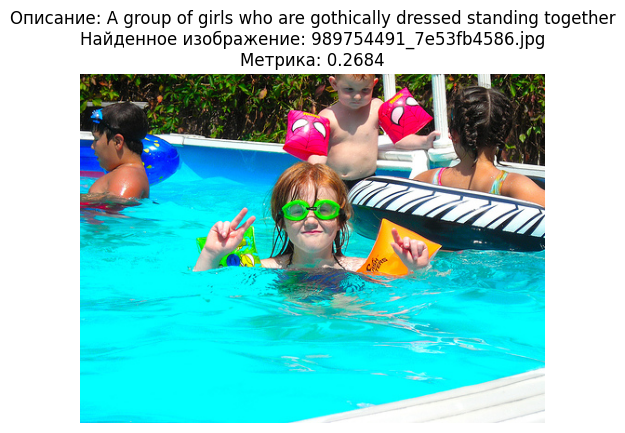

Описание: A group of girls who are gothically dressed standing together
Найденное изображение: 989754491_7e53fb4586.jpg
Метрика сходства: 0.2684



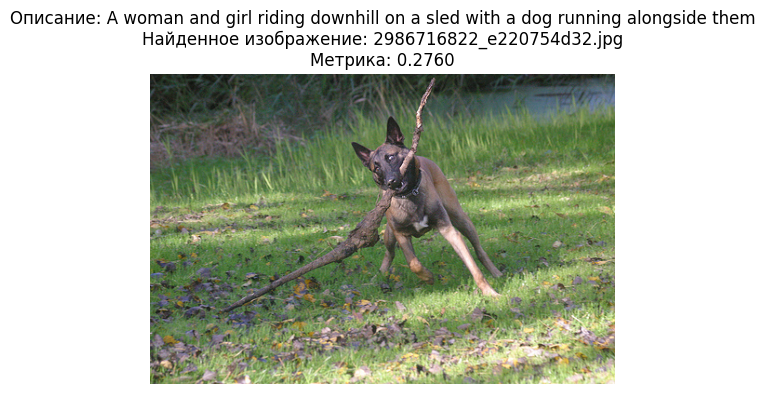

Описание: A woman and girl riding downhill on a sled with a dog running alongside them
Найденное изображение: 2986716822_e220754d32.jpg
Метрика сходства: 0.2760



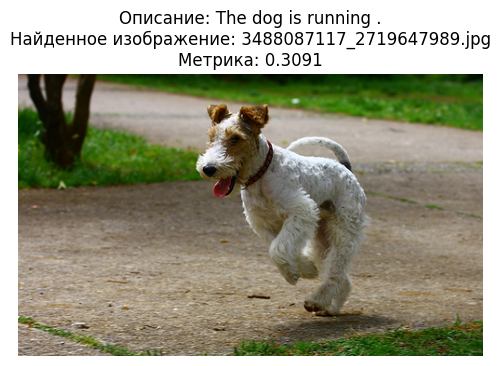

Описание: The dog is running .
Найденное изображение: 3488087117_2719647989.jpg
Метрика сходства: 0.3091



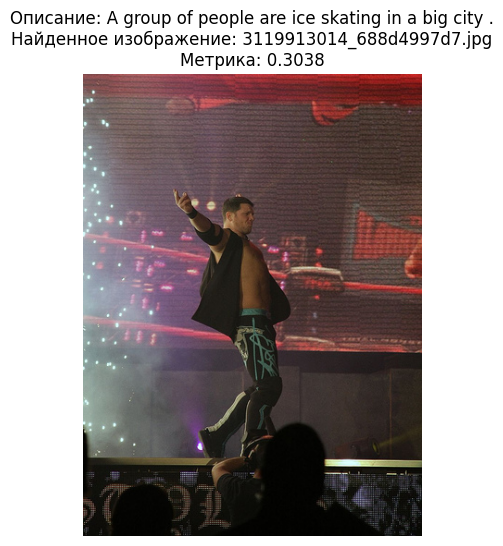

Описание: A group of people are ice skating in a big city .
Найденное изображение: 3119913014_688d4997d7.jpg
Метрика сходства: 0.3038



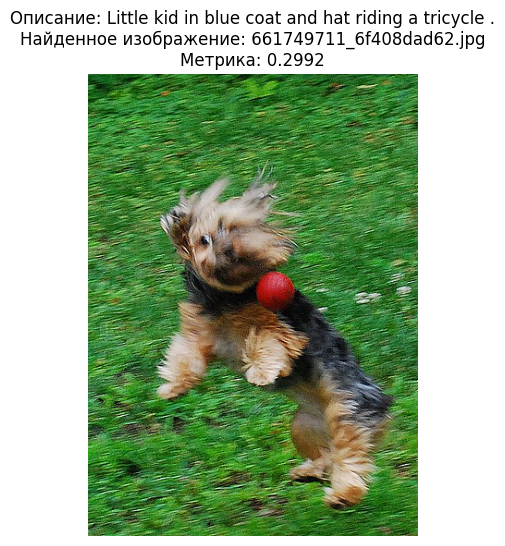

Описание: Little kid in blue coat and hat riding a tricycle .
Найденное изображение: 661749711_6f408dad62.jpg
Метрика сходства: 0.2992



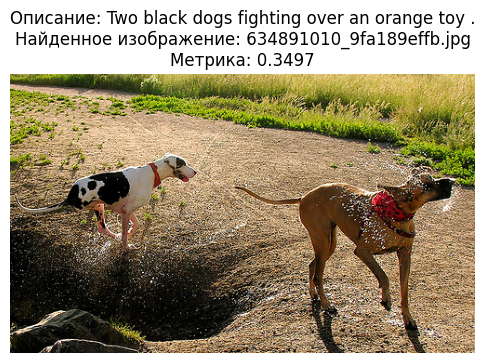

Описание: Two black dogs fighting over an orange toy .
Найденное изображение: 634891010_9fa189effb.jpg
Метрика сходства: 0.3497



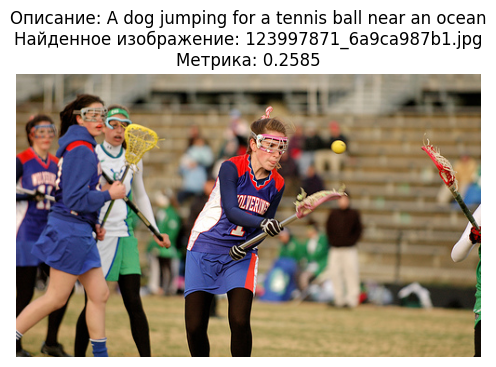

Описание: A dog jumping for a tennis ball near an ocean
Найденное изображение: 123997871_6a9ca987b1.jpg
Метрика сходства: 0.2585



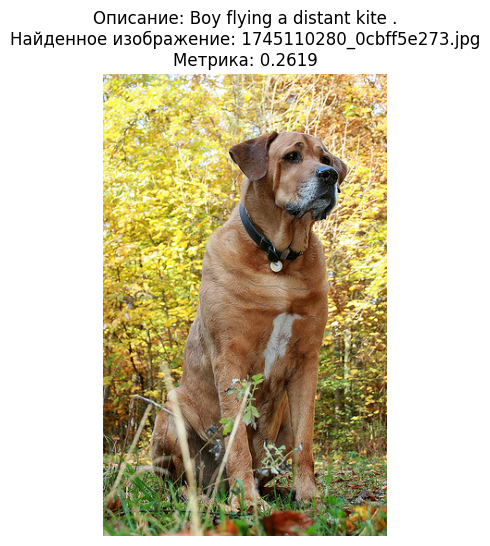

Описание: Boy flying a distant kite .
Найденное изображение: 1745110280_0cbff5e273.jpg
Метрика сходства: 0.2619



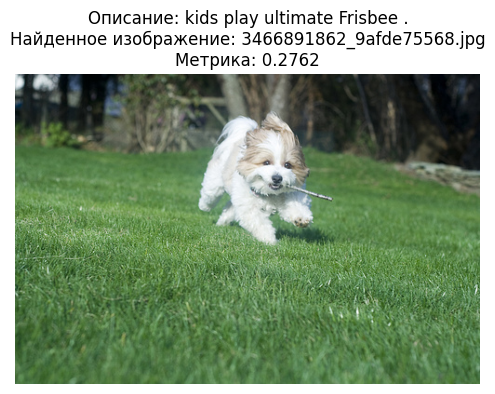

Описание: kids play ultimate Frisbee .
Найденное изображение: 3466891862_9afde75568.jpg
Метрика сходства: 0.2762



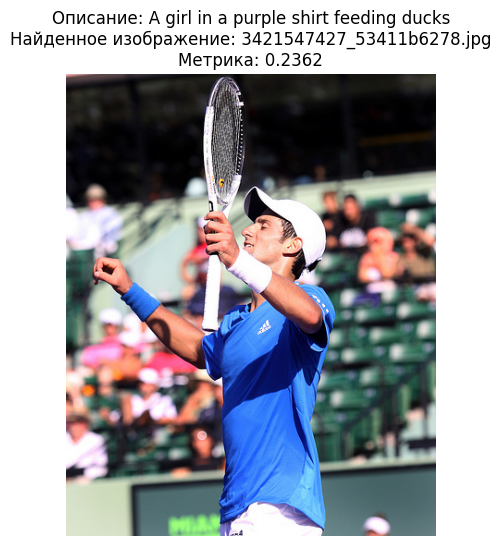

Описание: A girl in a purple shirt feeding ducks
Найденное изображение: 3421547427_53411b6278.jpg
Метрика сходства: 0.2362



In [62]:
# Создаем список использованных изображений
used_images = set()

# Берем 10 случайных описаний
random_texts = test_df['query_text'].sample(10, random_state=42).tolist()

print("\nРезультаты поиска изображений по тексту (Swish-модель):\n")
for text in random_texts:
    best_match, similarity = find_best_match_swish(text)
    print(f"Описание: {text}")
    print(f"Найденное изображение: {best_match}")
    print(f"Метрика сходства: {similarity:.4f}\n")

### Результат
Предсказания модели очень слабые, она находит какие-то соотвествия между словами и частями изображения.

#### Возможные причины:
- Обучение на малом объеме данных для сложных изображений
	•	Модель могла запомнить специфические связи, которые не работают на тесте.
- Низкая выразительность признаков
	•	Использование простого конкатенирования текстового и визуального эмбеддингов (BERT + ResNet18) могло не дать модели достаточно информации для хорошего предсказания.
- Недостаточно продуманная оценка соотвествия описания с изображением
- Отсутствие мультимодального обучения
	•	Лучшие модели для текст+изображение (например, CLIP от OpenAI) обучаются специально на мультимодальных данных, а мы просто используем стандартные эмбеддинги без специальной настройки.
- Еще одной причиной может быть запрет на обработку изображений с детьми. Это уменьшает выборку, и отсутствует обучение относительно изображений с детьми.

<img src="https://upload.wikimedia.org/wikipedia/commons/b/ba/Warning_sign_4.0.png" align=left width=44, heigth=33>
<div class="alert alert-warning">
Не стоит заранее векторизовать тексты. Лучше включить логику векторизации в функцию, которая будет по запросу искать изображение и делать векторизацию запроса "на лету".
</div>

<img src="https://upload.wikimedia.org/wikipedia/commons/b/ba/Warning_sign_4.0.png" align=left width=44, heigth=33>
<div class="alert alert-warning">

У нас всего 100 уникальных изображений. Не стоит векторизовать 500 изображений, тем самым мы в 5 раз увеличиваем затраты на хранение эмбеддингов, а также вычислительные ресурсы на поиск.

</div>

<img src="https://upload.wikimedia.org/wikipedia/commons/thumb/8/81/Stop_sign.png/240px-Stop_sign.png" align=left width=35, heigth=35>
<div class="alert alert-danger">
Здесь какая-то путанница в логике.

Для обучающих данных ты приводила эмбеддинги изображений к размерности 768.  А здесь зачем-то обучаешь НОВОЕ PCA преобразование с размерностью 334 и недостающее добиваешь нулями.
    
На этапе тестирования мы должны использовать то же самое преобразование, которое использовалось на этапе обучения моделей, а здесь у тебя все совершенно другое.    
</div>

Изучение тренировочных данных показало:
1. пропущенные значения отсутствуют, все ячейки в датафрейме заполнены;
2. дублирования данных нет;
3. полученная тренировочная выборка не сбалансирована: значительно преобладает количество нулевых оценок;
4. оценки экспертов и участников сильно отличаются.

#### Обучение
2. Для обработки текстов использована модель BERT
3. Изображения обработаны с помощью модели ResNet18
4. Для обучения были использованы нейронная модель и линейная регрессия.
5. Для оценки выбран критерий MAE.

#### Результаты:
Лучшей моделью для предсказаний оказалась нейронная сеть с активационной функцией GELU с использованием масштабированных данных. Предсказания модели очень слабые, она находит какие-то соотвествия между словами и частями изображения.

#### Рекоммендации:
1. Увеличение тренировочной выборки для таких сложных изображений.
2. Увеличение разнообразия изображений в тренировочной выборке.
2. Использование более сложных моделей (например, ResNet50) для обработки данных.
3. Использовать более продуманную оценку при использовании простых моделей.
4. Использовать мультимодальное обучение (например, CLIP от OpenAI).

<img src="http://s3.amazonaws.com/pix.iemoji.com/images/emoji/apple/ios-12/256/waving-hand.png" align=left width=44, heigth=44>
<div class="alert alert-info">
<b> Идеи и альтернативные подходы</b>
  Если хочешь получить хорошо работающее решение без обучения, то можешь провести эксперимент с нейронной сетью CLIP от OPEN AI (это не обязательно, только если хочешь добиться хороших результатов в этом проекте).

  Про эту нейронку много где написано, но можешь посмотреть например вот здесь  https://habr.com/ru/post/539312/.

  А для написания  реализации наиболее удобной лично для меня оказалась библиотека sbert. https://www.sbert.net/examples/applications/image-search/README.html  
    
    
<hr>    
    
Также неплохо работает следующий подход без предобученных моделей (к тому же легко реализуемый).
    
    
Вместо того, чтобы подавать на вход модели изображение + текст и получать меру соответствия, поступаем по другому. 
    
На вход модели подаем вектор описания, а на выходе учимся предсказывать вектор изображения. 
    
По поводу метрик тут ситуация следующая. Точно работает следующий подход
    
  - берем метрику mse, но тогда нужно чтобы модель её уменьшала. А значит в обучении используем только пары заведомо сответствующие друг другу

Можно попробовать использовать косинусное расстояние, она позволяет использовать все данные (если есть соответствие то выдает 1, если нет то 0). 
    
Также можно попробовать усложнить модель, например и изображения и тексты отправлять в пространство размерностью 256 и уже в этом пространстве учиться их "сближать".
    
По поводу методов векторизации: я бы использовать resnet18 для изображений (размерность эмбеддинга избражения 512) и БЕРТ для текстов (768). 
    
   
</div>

<img src="http://s3.amazonaws.com/pix.iemoji.com/images/emoji/apple/ios-12/256/waving-hand.png" align=left width=44, heigth=44>
<div class="alert alert-info">
<b> Заключительный комментарий</b>

Подведем итоги. Я вижу, что в целом с проектом ты справляешься.
    
Несмотря на то, что логика проекта немного запутанная, тем не менее все ключевые шаги выполнены: произведено объединение оценок, векторизация изображений и текстов, обучены модели.
    

Ключевая ошибка в логике тестирования. Здесь нужно явно искать изображения по описанию, а не использовать уже сфорированные пары.    
    
Пожалуйста проработай все красные комментарии.    
    
Желтые комментарии на твое усмотрение. Но скорее всего, когда ты напишешь корректное тестирование, то обнаружишь что использованный тобой подход  "не взлетел". Учитывая, что нам нужно хоть что-то показать заказчику, попробуй показать возможный инференс с помщью CLIP. С библиотекой sentence-transformers это делается буквально в 10 строк.    
Жду твою работу на повторное ревью.
</div>